In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from numpy import genfromtxt
X_train = genfromtxt('C:\\Users\\ogzsn\\OneDrive\\Masaüstü\\New folder\\X_train2D.csv', delimiter=',')
y_train = genfromtxt('C:\\Users\\ogzsn\\OneDrive\\Masaüstü\\New folder\\y_train.csv', delimiter=',')
X_test = genfromtxt('C:\\Users\\ogzsn\\OneDrive\\Masaüstü\\New folder\\X_test2D.csv', delimiter=',')
y_test = genfromtxt('C:\\Users\\ogzsn\\OneDrive\\Masaüstü\\New folder\\y_test.csv', delimiter=',')
X_val = genfromtxt('C:\\Users\\ogzsn\\OneDrive\\Masaüstü\\New folder\\X_val2D.csv', delimiter=',')
y_val = genfromtxt('C:\\Users\\ogzsn\\OneDrive\\Masaüstü\\New folder\\y_val.csv', delimiter=',')

In [6]:
X_train.shape

(6985, 1600)

In [7]:
import numpy as np

X_train=np.reshape(X_train,(X_train.shape[0], 40,40))
X_test=np.reshape(X_test,(X_test.shape[0], 40,40))
X_val=np.reshape(X_val,(X_val.shape[0], 40,40))



In [8]:


import tensorflow as tf

# Create a model object
model = tf.keras.Sequential()

# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'same',
                                 activation = 'relu',
                                 input_shape = (40,40,1)))
                                  

model.add(tf.keras.layers.MaxPool2D(2,2))

# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'same',
                                 activation = 'relu',
                                 ))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'same',
                                 activation = 'relu',
                                 ))


model.add(tf.keras.layers.Flatten())

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )





In [14]:
# Train the model for 30 epochs with batch size of 128
results= model.fit(X_train, y_train,
                   batch_size=128,
                   epochs=30,
                   validation_data= (X_val, y_val)
                   )

Epoch 1/30
55/55 [==============================] - 11s 196ms/step - loss: 1.7861 - accuracy: 0.3407 - val_loss: 1.3309 - val_accuracy: 0.5945
Epoch 2/30
55/55 [==============================] - 11s 194ms/step - loss: 1.5977 - accuracy: 0.4218 - val_loss: 1.1499 - val_accuracy: 0.6392
Epoch 3/30
55/55 [==============================] - 11s 194ms/step - loss: 1.4573 - accuracy: 0.4816 - val_loss: 1.0368 - val_accuracy: 0.6724
Epoch 4/30
55/55 [==============================] - 11s 195ms/step - loss: 1.3729 - accuracy: 0.5184 - val_loss: 0.9367 - val_accuracy: 0.6747
Epoch 5/30
55/55 [==============================] - 10s 189ms/step - loss: 1.2509 - accuracy: 0.5522 - val_loss: 0.8347 - val_accuracy: 0.7468
Epoch 6/30
55/55 [==============================] - 11s 194ms/step - loss: 1.1602 - accuracy: 0.5934 - val_loss: 0.7909 - val_accuracy: 0.7835
Epoch 7/30
55/55 [==============================] - 10s 188ms/step - loss: 1.0534 - accuracy: 0.6299 - val_loss: 0.7103 - val_accuracy: 0.8041

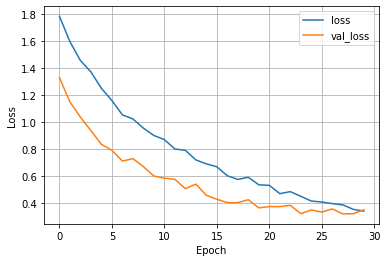

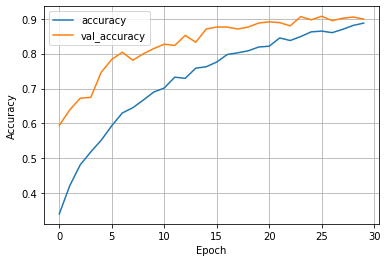

In [15]:
plt.plot(results.history["loss"], label = "loss")
plt.plot(results.history["val_loss"], label = "val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

plt.plot(results.history["accuracy"], label = "accuracy")
plt.plot(results.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()





In [16]:
model.evaluate(X_test,y_test)

28/28 [==============================] - 0s 15ms/step - loss: 0.4561 - accuracy: 0.8810


[0.45609501004219055, 0.8810068368911743]